In [2]:
!pip install gitpython

In [3]:
import pandas as pd
import os
from git import Repo
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


In [4]:
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [5]:
df1 = pd.read_csv(url1)
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [6]:
df2 = pd.read_csv(url2)
df2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1154 entries, UID to 3/9/23
dtypes: float64(3), int64(1145), object(6)
memory usage: 29.4+ MB


In [8]:
df2 = df2.rename(columns={'Country/Region': 'country'}).iloc[:, 1:]

In [9]:
df2

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1146 entries, country to 3/9/23
dtypes: float64(2), int64(1143), object(1)
memory usage: 2.5+ MB


In [11]:
countries=gpd.read_file('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


In [12]:
countries

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,geometry
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,None
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,None
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,None
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,None
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,None
285,,Winter Olympics 2022,39.9042,116.4074,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,None
286,,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,None
287,,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,None


In [13]:
df2.iloc[100:]

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
100,Cuba,21.521757,-77.781167,0,0,0,0,0,0,0,...,1112598,1112603,1112609,1112613,1112622,1112625,1112631,1112631,1112637,1112643
101,Cyprus,35.126400,33.429900,0,0,0,0,0,0,0,...,649093,649093,649093,650685,650685,650685,650685,650685,650685,650685
102,Czechia,49.817500,15.473000,0,0,0,0,0,0,0,...,4609820,4611001,4611985,4612903,4613882,4614022,4614143,4615945,4617114,4618256
103,Denmark,61.892600,-6.911800,0,0,0,0,0,0,0,...,34658,34658,34658,34658,34658,34658,34658,34658,34658,34658
104,Denmark,71.706900,-42.604300,0,0,0,0,0,0,0,...,11971,11971,11971,11971,11971,11971,11971,11971,11971,11971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [14]:


# Group the data by country or region
data_grouped = df2.groupby('country').sum().reset_index()


# Create a choropleth map using Plotly Express
fig = px.choropleth(data_grouped,
                    locations="country",
                    locationmode='country names',
                    color=data_grouped.columns[-1],  # Use the latest column (latest date)
                    hover_name="country",
                    color_continuous_scale="Viridis",  # You can change the color scale
                    title="COVID-19 Confirmed Cases by Country")
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

# Show the map
fig.show()


In [15]:
# Select data for the specific date (e.g., '1/24/20')
selected_date = '1/24/20'
data_selected_date = df2[['country', selected_date]]

# Create a choropleth map for the selected date
fig = px.choropleth(data_selected_date,
                    locations="country",
                    locationmode='country names',
                    color=selected_date,
                    hover_name="country",
                    color_continuous_scale="Viridis",
                    title=f"COVID-19 Confirmed Cases by Country on {selected_date}")
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

# Show the map
fig.show()


In [16]:
selected_date = '3/9/23'
selected_country = 'Afghanistan'
# Filter the data for the selected date and country
data_selected = df2[df2['country'] == selected_country]
total_cases = data_selected[selected_date].sum()
# Print the total number of confirmed cases for the selected date and country
print(f'Total confirmed cases in {selected_country} on {selected_date}: {total_cases}')



Total confirmed cases in Afghanistan on 3/9/23: 209451


In [17]:
# Create a new DataFrame to store the total confirmed cases by date
df2_columns = df2.columns[4:]
datewise_data = df2[df2_columns].sum().reset_index()
datewise_data.columns = ['Date', '  Total Confirmed cases']



In [18]:
datewise_data

,Date,Total Confirmed cases
0,1/23/20,657
1,1/24/20,944
2,1/25/20,1437
3,1/26/20,2120
4,1/27/20,2929
...,...,...
1137,3/5/23,676024901
1138,3/6/23,676082941
1139,3/7/23,676213378
1140,3/8/23,676392824


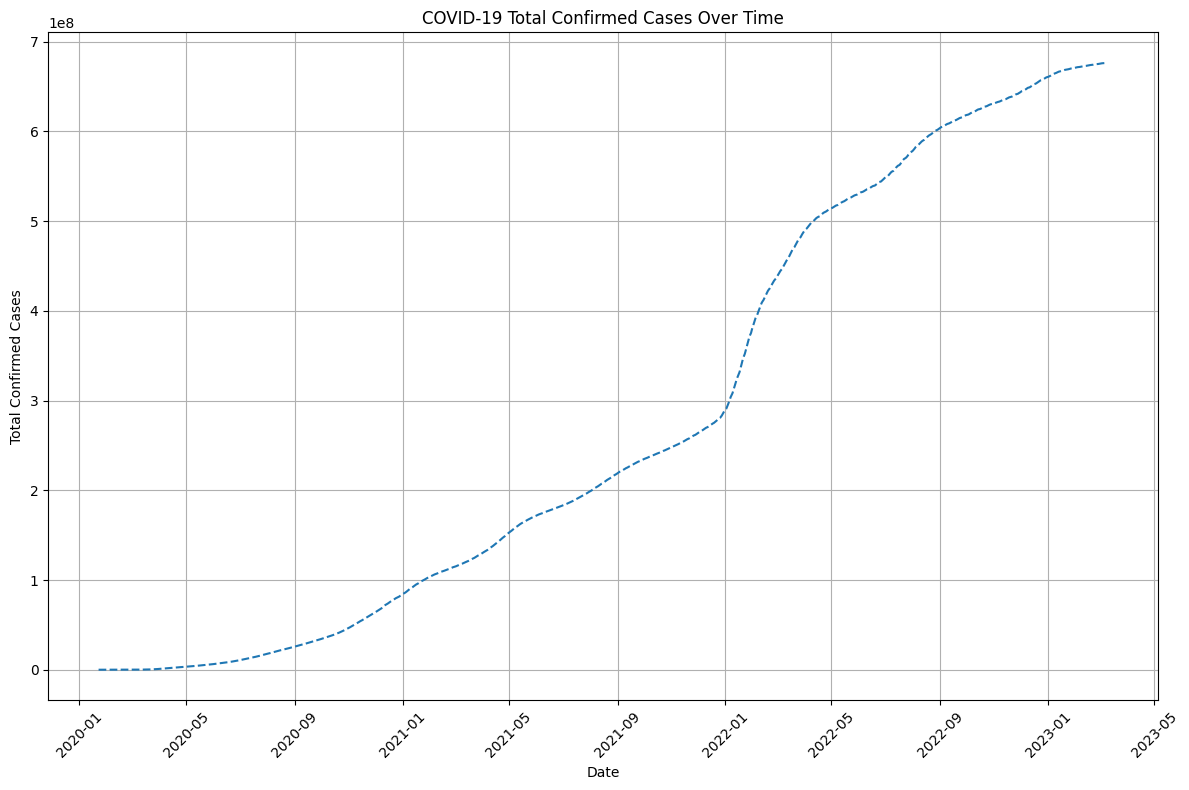

In [19]:
date_columns = df2.columns[4:]  # Select the date columns from the df2
total_cases_by_date =df2[df2_columns].sum()
dates = pd.to_datetime(total_cases_by_date.index)

# Create a line plot for date vs. total confirmed cases
plt.figure(figsize=(12, 8))
plt.plot(dates, total_cases_by_date,  linestyle='--')
plt.title('COVID-19 Total Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()






In [20]:
#current top countries having most active cases at particular date
top_actives=data_grouped.groupby("country")["3/9/23"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives.rename(columns={"3/9/23":"active"},inplace=True)
top_actives


,country,active
0,US,103802702
1,India,44690738
2,France,39866718
3,Germany,38249060
4,Brazil,37076053
5,Japan,33320438
6,"Korea, South",30615522
7,Italy,25603510
8,United Kingdom,24658705
9,Russia,22075858


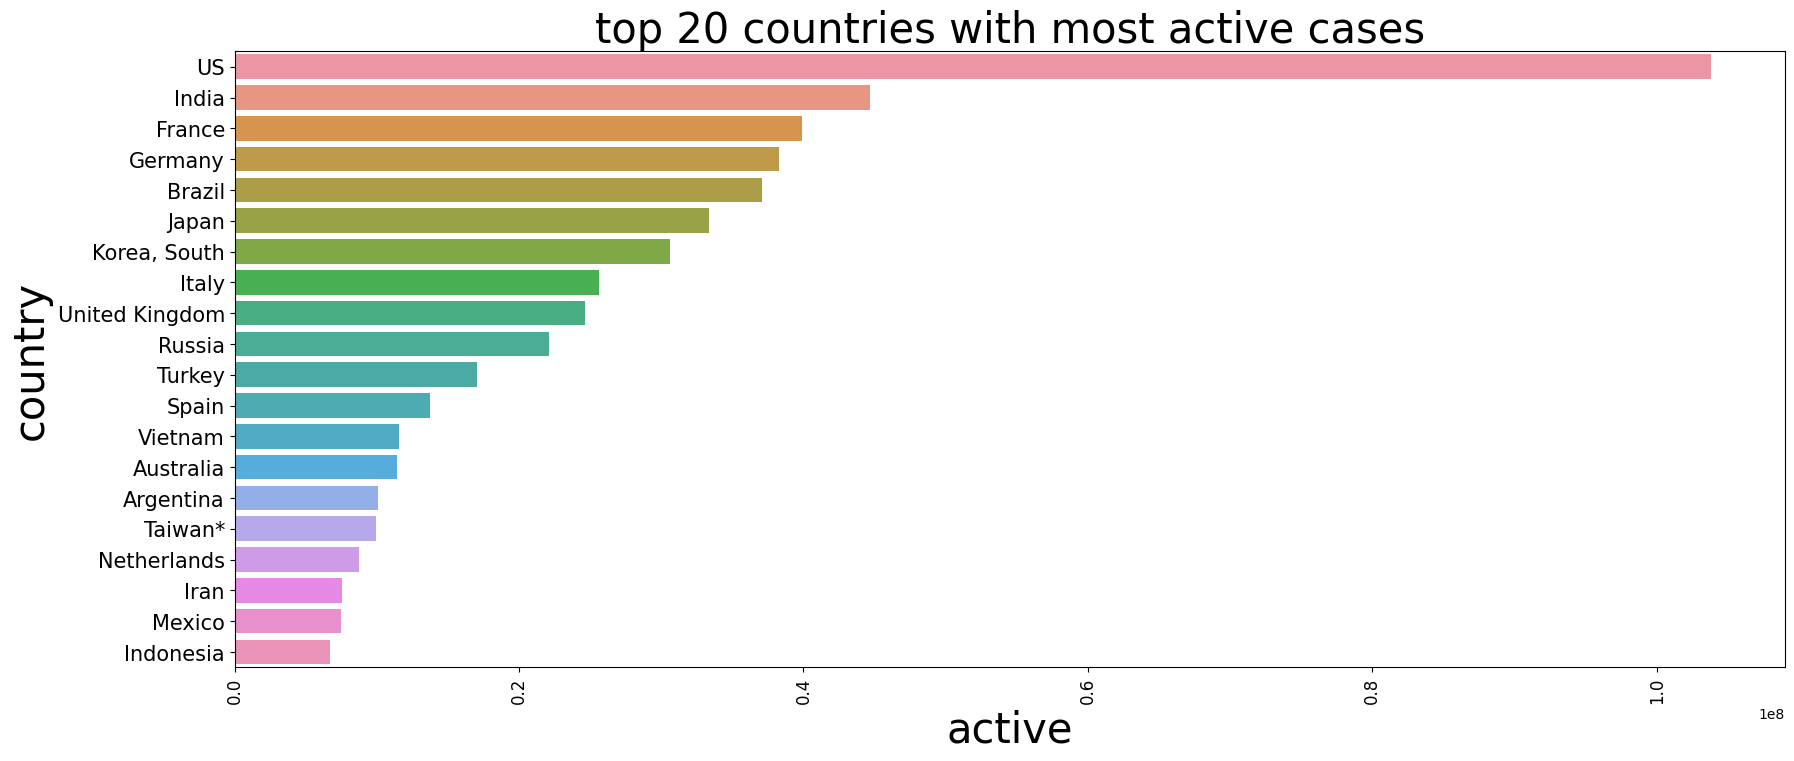

In [21]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("3/9/23",fontsize=30)
plt.ylabel("country",fontsize=30)
plt.title("top 20 countries with most active cases",fontsize=30)
ax=sns.barplot(x=top_actives.active,y=top_actives.country)


In [22]:
#Data of india
india=df2[df2.country=="India"]
india


,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
148,India,20.593684,78.96288,0,0,0,0,0,0,0,...,44687837,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738
